# 计算物理学：Python 与 JupyterLab 环境介绍

---

## 1. 什么是 Python？

- Python 是一种高级、通用、易学的编程语言。
- 特点：
  - 简洁、可读性强，适合教学和科研。
  - 拥有强大的科学计算库（NumPy、SciPy、Matplotlib、SymPy 等）。
  - 跨平台，支持 Windows / macOS / Linux。
- 在计算物理中，Python 常用于数值计算、可视化和数据分析。

---

## 2. 什么是 JupyterLab？

- JupyterLab 是一个交互式开发环境（IDE）。
- 特点：
  - 支持 **Notebook** 形式：文字 + 公式 + 代码 + 图形 混合。
  - 内置 Markdown 和 LaTeX 支持，适合写讲义或科研笔记。
  - 可以直接运行 Python 代码并展示结果。

---

## 3. JupyterLab 基本单元

JupyterLab 有两种常用单元（Cell）：
1. **Markdown 单元**：写说明、文字、公式。
2. **代码单元**：写 Python 代码并执行。

下面分别展示例子。

## 4. Markdown 单元示例

这是一个 Markdown 单元，可以写文字、列表、公式：

- 文字说明
- 公式（LaTeX 支持）：

$$
E = mc^2
$$

- 代码高亮：

```python
print("Hello Physics!")


## 5. Python 代码单元示例

In [6]:
print("Hello, JupyterLab! This is Computational Physics.")

Hello, JupyterLab! This is Computational Physics.


## 6. 科学计算示例：使用 NumPy

In [3]:
import numpy as np

# 定义一个向量和矩阵
v = np.array([1, 2, 3])
M = np.array([[1, 2], [3, 4]])

print("向量 v =", v)
print("矩阵 M =\n", M)

# 简单运算
print("向量点积 =", np.dot(v, v))
print("矩阵行列式 =", np.linalg.det(M))


向量 v = [1 2 3]
矩阵 M =
 [[1 2]
 [3 4]]
向量点积 = 14
矩阵行列式 = -2.0000000000000004


# 7. 可视化示例：绘制函数图像

In [4]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [27]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

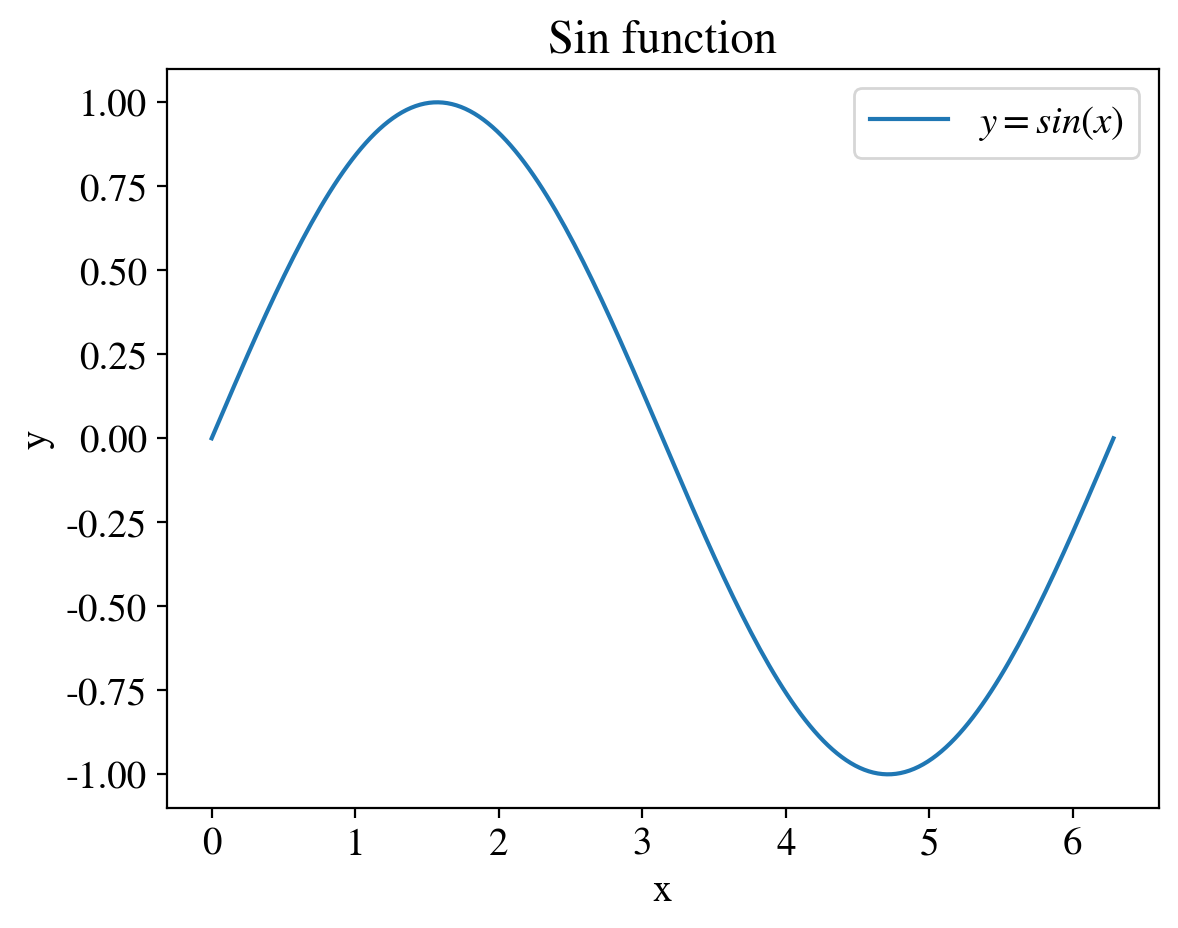

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.plot(x, y, label= r"$y = \sin(x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sin function")
plt.legend()
plt.show()


## 8. JupyterLab 的优势总结

- **交互性强**：修改代码 → 立刻运行 → 立即得到结果。
- **实验性强**：适合计算物理的数值实验。
- **文档友好**：结合 Markdown 和公式，方便写学习笔记。
- **可扩展**：支持插件和多种语言内核（不仅限于 Python）。

---

## 计算实践

### 截断误差 

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!} + R_n (x)
$$

In [19]:
import math

def taylor_exp(x, n):
    """
    Calculates e^x using its Taylor series expansion up to the n-th term.
    
    Args:
        x (float): The value to compute e^x for.
        n (int): The number of terms in the series (starting from 0).
        
    Returns:
        float: The approximated value of e^x.
    """
    
    result = 0.0
    for i in range(n + 1):
        term = (x ** i) / math.factorial(i)
        result += term
        
    return result

# --- Example Usage ---
x_val = 1.0
n_terms = 5

# Calculate the approximation
approx_e = taylor_exp(x_val, n_terms)

# Get the true value from the math library for comparison
true_e = math.exp(x_val)

print(f"Approximation of e^{x_val} with {n_terms} terms: {approx_e}")
print(f"True value of e^{x_val}: {true_e}")
print(f"Difference: {abs(approx_e - true_e)}")

Approximation of e^1.0 with 5 terms: 2.7166666666666663
True value of e^1.0: 2.718281828459045
Difference: 0.0016151617923787498


### 避免相邻二数相减 


$\sqrt{1001} = 31.64$, $\sqrt{1000} = 31.62$, 求$\sqrt{1001}-\sqrt{1000}$的值

$$
\sqrt{1001}-\sqrt{1000} = 31.64 - 31.62 = 0.02
$$

\begin{align*}
\sqrt{1001} - \sqrt{1000} &= \frac{(\sqrt{1001})^2 - (\sqrt{1000})^2}{\sqrt{1001} + \sqrt{1000}} \\
&= \frac{1001 - 1000}{\sqrt{1001} + \sqrt{1000}} \\
&\approx \frac{1}{31.64 + 31.62} \approx 0.01581
\end{align*}

In [20]:
np.sqrt(1001) - np.sqrt(1000)

np.float64(0.015807437428957627)

In [22]:
1.0 / ( np.sqrt(1001) + np.sqrt(1000) )

np.float64(0.015807437428955823)

### 防止大数吃掉小数 

\begin{align*}
S_A = & \frac{1}{100000} + \frac{1}{9999}  + \frac{1}{9998} + \cdots + \frac{1}{3} + \frac{1}{2}  + 1  \\
S_B = & 1 + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{9998} + \frac{1}{9999} + \frac{1}{100000} 
\end{align*}

#### 真正的结果需要通过程序进行验证，教材中的例子未必在现行程序中成立！

In [23]:
import math

def sum_small_to_large(n):
    """Sums the harmonic series from 1/n to 1."""
    total = 0.0
    for i in range(n, 0, -1):
        total += 1.0 / i
    return total

def sum_large_to_small(n):
    """Sums the harmonic series from 1 to 1/n."""
    total = 0.0
    for i in range(1, n + 1):
        total += 1.0 / i
    return total

n = 100000

# Summing from the smallest term to the largest (S_A)
sum_a = sum_small_to_large(n)

# Summing from the largest term to the smallest (S_B)
sum_b = sum_large_to_small(n)

# A more accurate reference value (not exactly the theoretical value, but close)
# This is a known result for the harmonic series up to n=100000
# Euler-Mascheroni constant (gamma) is approx 0.5772156649
# log(100000) = 11.51292546
# Sum is approx log(n) + gamma = 11.51292546 + 0.5772156649 = 12.0901411249
reference_value = 12.0901411249

print(f"Summing from smallest to largest (S_A): {sum_a:.9f}")
print(f"Summing from largest to smallest (S_B): {sum_b:.9f}")
print("-" * 30)
print(f"Reference Value:                 {reference_value:.9f}")
print(f"Difference (S_A vs. Reference):  {abs(sum_a - reference_value):.9f}")
print(f"Difference (S_B vs. Reference):  {abs(sum_b - reference_value):.9f}")


Summing from smallest to largest (S_A): 12.090146130
Summing from largest to smallest (S_B): 12.090146130
------------------------------
Reference Value:                 12.090141125
Difference (S_A vs. Reference):  0.000005005
Difference (S_B vs. Reference):  0.000005005


In [26]:
import math

def taylor_exp_positive(x, n_terms):
    """
    Calculates e^x using its standard Taylor series.
    This method avoids cancellation errors for positive x.
    """
    result = 0.0
    term = 1.0
    for i in range(n_terms + 1):
        if i > 0:
            term = term * x / i
        result += term
    return result

def taylor_exp_negative_direct(x, n_terms):
    """
    Calculates e^(-x) directly using its alternating Taylor series.
    This can suffer from significant cancellation errors.
    """
    if x < 0:
        raise ValueError("Input x must be non-negative for this series.")
    
    result = 0.0
    term = 1.0
    for i in range(n_terms + 1):
        if i > 0:
            term = term * (-x) / i
        result += term
    return result

# --- Example Usage ---
x_val = 15.0  # A large positive number to demonstrate the error
n_terms = 50   # A sufficient number of terms for the series

# Method 1: The direct, alternating series
approx_direct = taylor_exp_negative_direct(x_val, n_terms)

# Method 2: The more stable reciprocal method
approx_reciprocal = 1.0 / taylor_exp_positive(x_val, n_terms)

# True value for comparison
true_value = math.exp(-x_val)

print(f"Calculating e^(-{x_val}) with {n_terms} terms:")
print("-" * 50)
print(f"Direct alternating series result:  {approx_direct:.15f}")
print(f"Stable reciprocal series result:   {approx_reciprocal:.15f}")
print("-" * 50)
print(f"True value (math.exp):             {true_value:.15f}")
print("-" * 50)
print(f"Error (Direct vs. True):           {abs(approx_direct - true_value):.15f}")
print(f"Error (Reciprocal vs. True):       {abs(approx_reciprocal - true_value):.15f}")

Calculating e^(-15.0) with 50 terms:
--------------------------------------------------
Direct alternating series result:  0.000000784011889
Stable reciprocal series result:   0.000000305902321
--------------------------------------------------
True value (math.exp):             0.000000305902321
--------------------------------------------------
Error (Direct vs. True):           0.000000478109568
Error (Reciprocal vs. True):       0.000000000000000


## 熟悉界面环境